# Campus X Laptop Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("laptop_data.csv")

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)   # Dropping the Unnamed column


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int) # Removing the GB from the Ram column and converting it to int   
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float) # Removing the kg from the Weight column and converting it to float


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<Axes: xlabel='Price', ylabel='Count'>

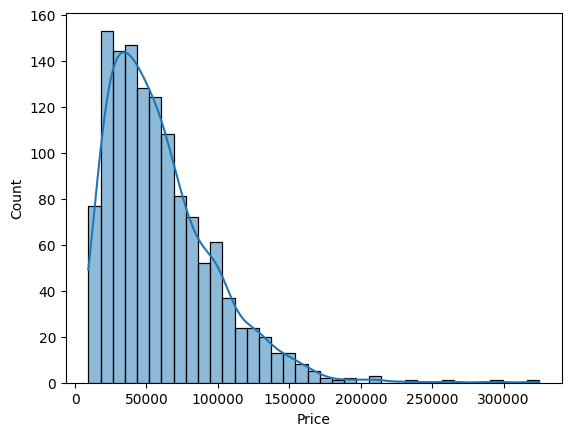

In [15]:
sns.histplot(df['Price'], kde=True)
# dATA IS RIGHT SKEWED

In [16]:
print(df[df['Company']== 'MSI']['Price'].mean())

92116.22613333333


56891.0442218978


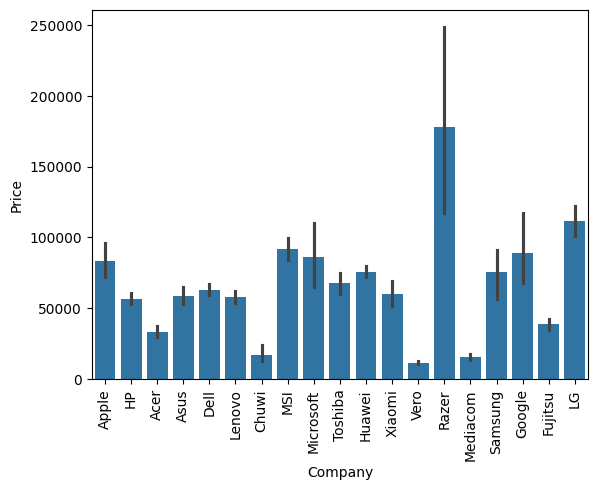

In [17]:
print(df[df['Company']=='HP']['Price'].mean()) # BAr plot ka average aur iska AVG same hain ki nahi isko check karne ke liye 

# Yeh bar plot se company ke laptop ka average price hai
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

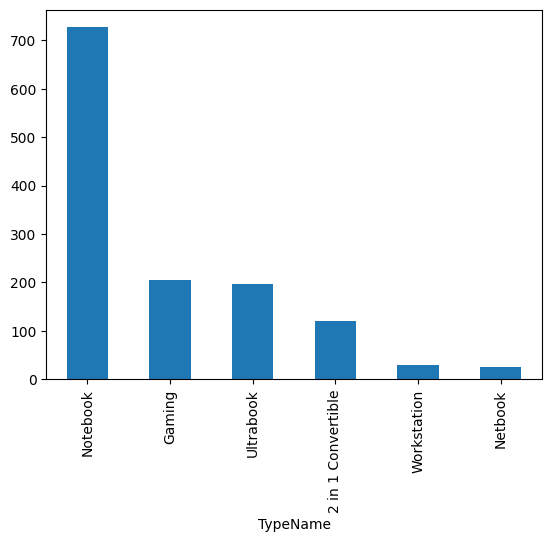

In [18]:
df['TypeName'].value_counts().plot(kind='bar')
# Sabse jayada notebook hain

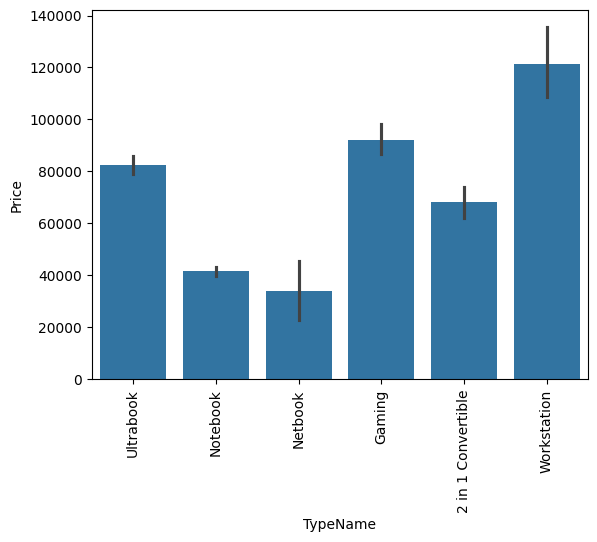

In [19]:
# Yeh bar plot se company ke laptop ka average price hai
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


<Axes: xlabel='Inches', ylabel='Count'>

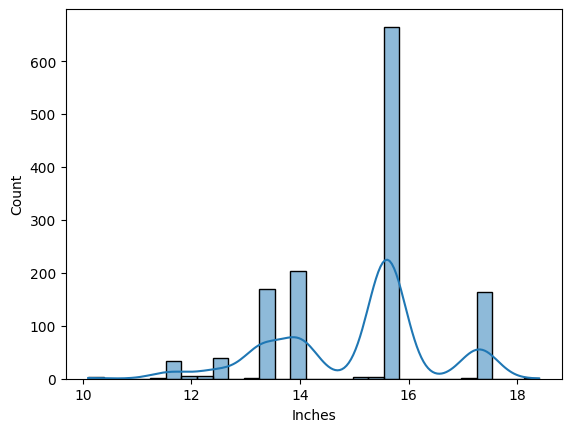

In [20]:
print(df['Inches'].value_counts())

# Hist plot counting btata hain
sns.histplot(df['Inches'], kde=True)
# Sabse jayada 15 se 16 inches wale laptop hain

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '10.1'),
  Text(1, 0, '11.3'),
  Text(2, 0, '11.6'),
  Text(3, 0, '12.0'),
  Text(4, 0, '12.3'),
  Text(5, 0, '12.5'),
  Text(6, 0, '13.0'),
  Text(7, 0, '13.3'),
  Text(8, 0, '13.5'),
  Text(9, 0, '13.9'),
  Text(10, 0, '14.0'),
  Text(11, 0, '14.1'),
  Text(12, 0, '15.0'),
  Text(13, 0, '15.4'),
  Text(14, 0, '15.6'),
  Text(15, 0, '17.0'),
  Text(16, 0, '17.3'),
  Text(17, 0, '18.4')])

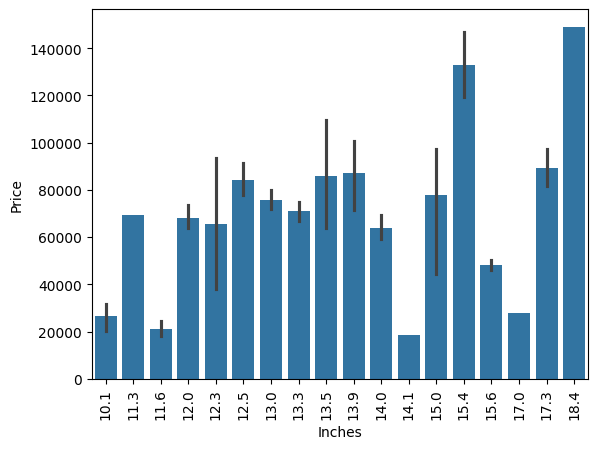

In [21]:
# jasie jaise inches badh rahe hain waise waise price bhi badh raha hain
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')

In [22]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [23]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
533,Mediacom,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.20,19660.32,0
303,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.72,0
949,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,18594.72,0
918,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,71874.72,0
169,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,40173.12,0


<Axes: xlabel='TouchScreen'>

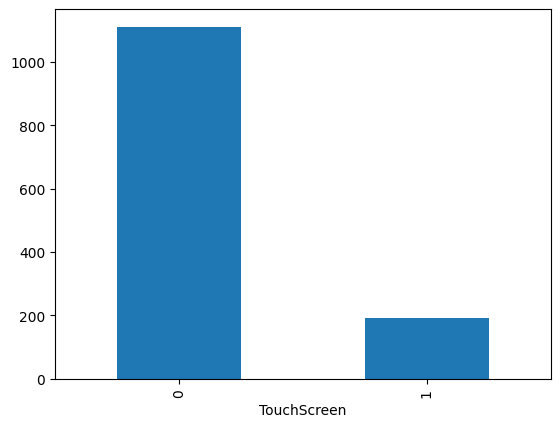

In [25]:
df['TouchScreen'].value_counts().plot(kind='bar')

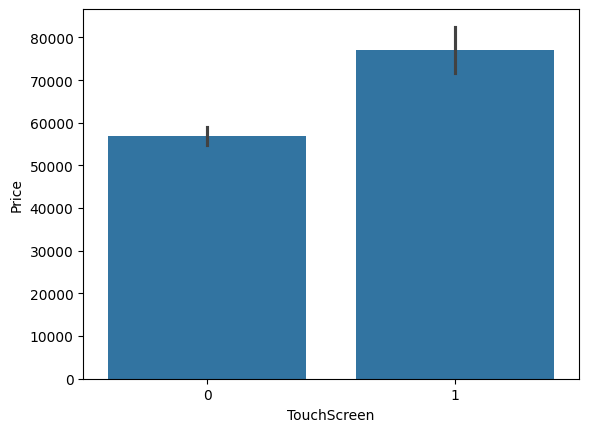

In [26]:

sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.show()
# TouchScreen Wale ka PRice jayda hain

In [27]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

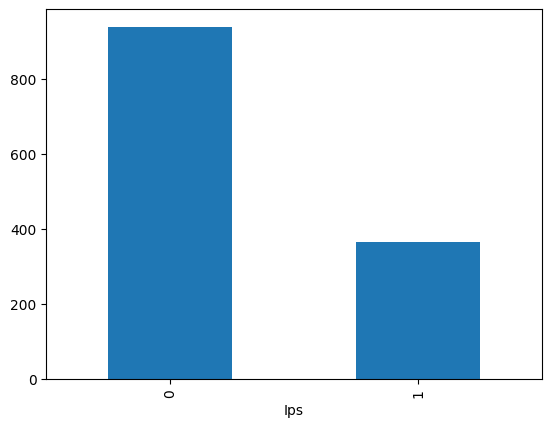

In [29]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

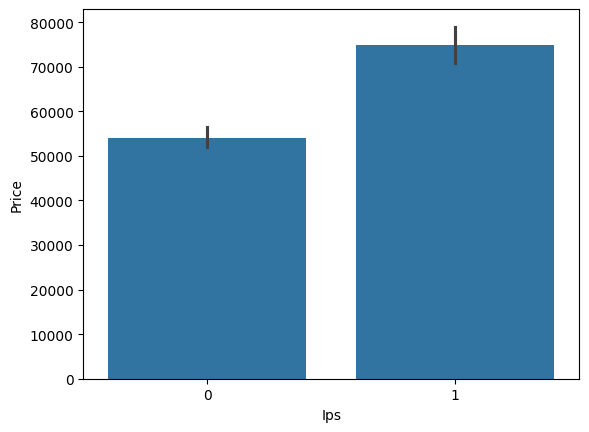

In [30]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [31]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
# x ke basis pe split kar diya and n=1 matlab only 1 split hoga matlab Only the 
# first occurrence of 'x' is used as a separator.
# expand=True means return into column form  otherwise it will return into row form

In [32]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [33]:
new[1]

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: 1, Length: 1303, dtype: object

In [34]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

# isme 3 chij kiya gya hain pehle toh , ko replace kiya hain phir findall
# kiya hain jo ki string ko find karega aur uski jagah numeric value milega 
# aur uske baad apply kiya hain lambda function jisse ki list se nikal ke 1 value return
# karega


In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [40]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [41]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [42]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [44]:
df.drop(columns=['ScreenResolution'],inplace=True)


In [45]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi
113,HP,Notebook,14.0,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.63,38468.1600,0,1,1366,768,111.935204
1288,Asus,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0,1366,768,100.454670
343,Lenovo,2 in 1 Convertible,13.9,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.40,111834.7200,1,1,3840,2160,316.965060
448,MSI,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,54757.9872,0,0,1920,1080,141.211998
529,Dell,Notebook,15.6,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,73366.5600,0,0,1920,1080,141.211998


In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
920,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,36496.2672,0,0,100.454670
651,Acer,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,37775.5200,0,0,141.211998
518,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,47365.9200,0,0,141.211998
1081,Lenovo,Gaming,Intel Core i7 6820HK 2.7GHz,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,172627.2000,0,1,127.335675
640,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.50,59087.5200,0,1,141.211998


In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [ ]:

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df['Cpu brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu brand, Length: 1303, dtype: object

<Axes: xlabel='Cpu brand'>

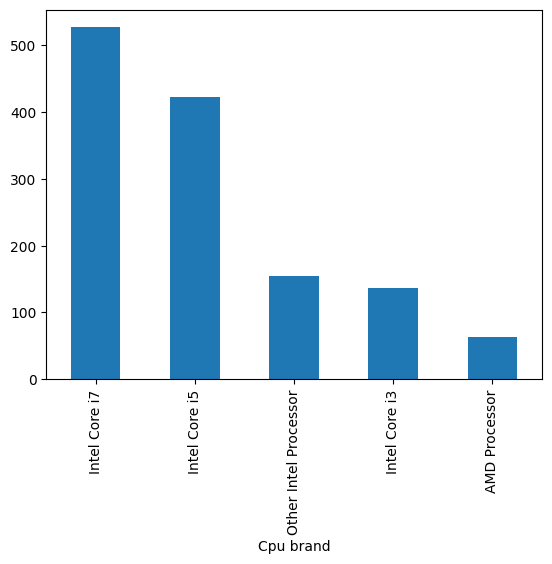

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

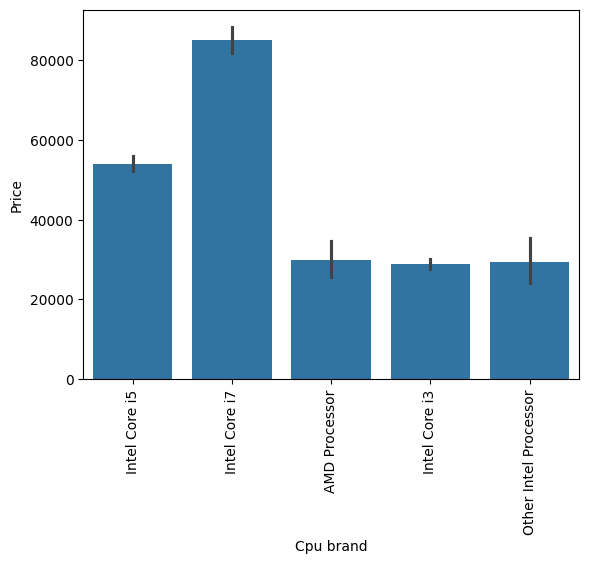

In [ ]:

sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

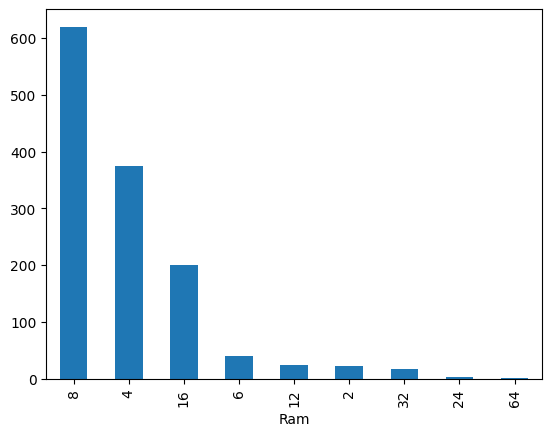

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

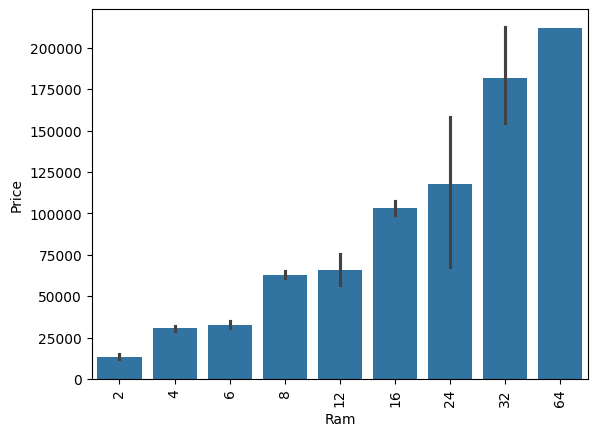

In [ ]:

sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [ ]:
# Convert 'Memory' column to string and clean up 'GB' and 'TB'
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False)
df['Memory'] = df['Memory'].str.replace('TB', '024', regex=False)  # Convert TB to GB (1TB = 1024GB)

# Split the memory column into two parts
new = df['Memory'].str.split('+', n=1, expand=True)

# Process the first memory component
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0').str.strip()  # Process the second memory component (if exists)

# Identify storage types for the first memory component
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from the first memory component
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Identify storage types for the second memory component
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove non-numeric characters from the second memory component
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert first and second columns to integers
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

# Calculate total sizes for each storage type
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)



**Both Method uppar wala aur yeh niche wala are doing same work**

In [ ]:
# Yeh bhi wohi kaam kar raha hain jo ki isse uppar wala code kar raha hain

def parse_storage(storage):
    import re

    # Split multiple storages using "+" as a delimiter
    parts = [part.strip() for part in storage.split('+')]
    
    # Initialize storage dictionary
    storage_dict = {'HDD': 0, 'SSD': 0, 'Flash Storage': 0, 'Hybrid': 0}

    for part in parts:
        # Extract size and type using regex
        match = re.match(r'(\d+\.?\d*)([A-Z]+)\s(.+)', part)
        if match:
            size, unit, storage_type = match.groups()
            # Convert size to GB
            size_gb = float(size) * 1024 if unit == 'TB' else float(size)
            # Add size to the appropriate storage type
            if storage_type in storage_dict:
                storage_dict[storage_type] += size_gb
    
    return storage_dict

# Apply the parsing function to each row and expand into multiple columns
parsed_storage = df['Memory'].apply(parse_storage)
parsed_df = pd.DataFrame(parsed_storage.tolist())

# Combine the parsed storage data with the original DataFrame
df_cleaned = pd.concat([df, parsed_df], axis=1)

# Output the cleaned DataFrame
print(df_cleaned)

     Company            TypeName  Ram               Memory  \
0      Apple           Ultrabook    8            128GB SSD   
1      Apple           Ultrabook    8  128GB Flash Storage   
2         HP            Notebook    8            256GB SSD   
3      Apple           Ultrabook   16            512GB SSD   
4      Apple           Ultrabook    8            256GB SSD   
...      ...                 ...  ...                  ...   
1298  Lenovo  2 in 1 Convertible    4            128GB SSD   
1299  Lenovo  2 in 1 Convertible   16            512GB SSD   
1300  Lenovo            Notebook    2   64GB Flash Storage   
1301      HP            Notebook    6              1TB HDD   
1302    Asus            Notebook    4            500GB HDD   

                               Gpu       OpSys  Weight        Price  \
0     Intel Iris Plus Graphics 640       macOS    1.37   71378.6832   
1           Intel HD Graphics 6000       macOS    1.34   47895.5232   
2            Intel HD Graphics 620       N

In [ ]:
df_cleaned

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,128.0,0.0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0.0,128.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0.0,512.0,0.0,0.0
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0.0,0.0,64.0,0.0
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1024.0,0.0,0.0,0.0


In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
284,Acer,Notebook,8,256 SSD,Nvidia GeForce MX150,Windows 10,3.00,50669.2800,0,1,141.211998,Intel Core i7,0,256,0,0
735,Lenovo,Notebook,4,1024 HDD,Intel HD Graphics 620,Windows 10,1.85,41505.1200,0,0,141.211998,Intel Core i7,1024,0,0,0
1287,HP,Notebook,6,1024 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1024,0,0,0
95,Acer,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.50,45128.1600,1,1,165.632118,Intel Core i5,0,256,0,0
413,Acer,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.60,42038.4528,1,1,165.632118,Intel Core i7,0,256,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.095091
SSD              0.670682
Hybrid           0.008011
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
# kiu ki bahut kam corelation hain inka price ke sath me

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\subas\AppData\Local\Temp\ipykernel_11308\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:

df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [ ]:
df = df[df['Gpu brand'] != 'ARM']

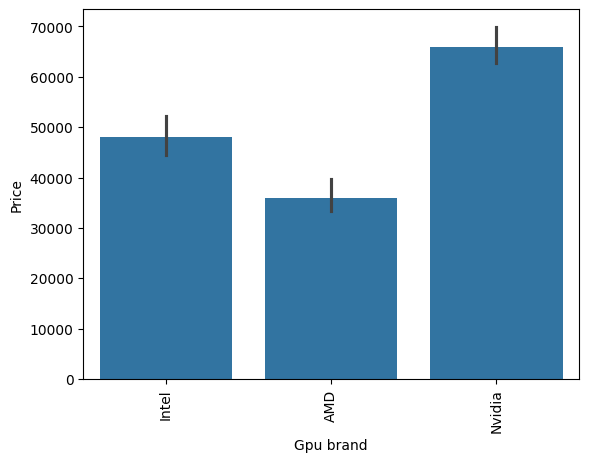

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

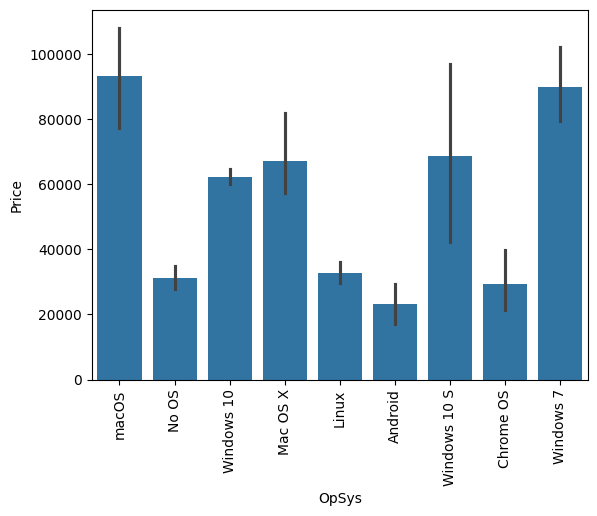

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\subas\AppData\Local\Temp\ipykernel_11308\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\subas\AppData\Local\Temp\ipykernel_11308\2632010566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


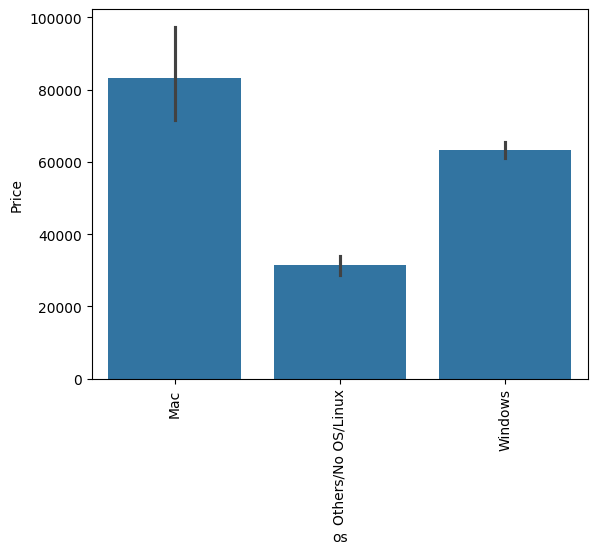

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

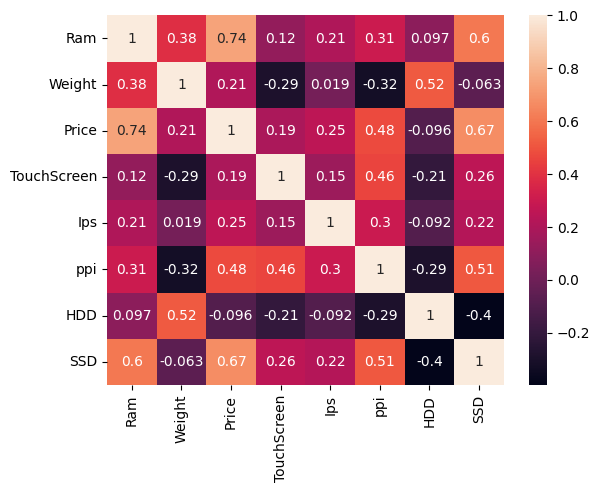

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Weight', ylabel='Count'>

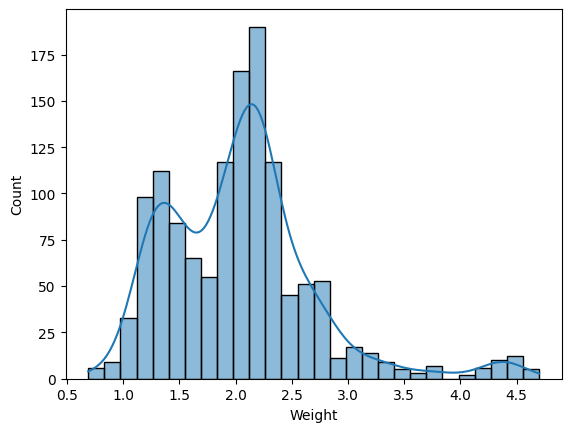

In [ ]:
sns.histplot(df['Weight'],kde=True) 

<Axes: xlabel='Price', ylabel='Count'>

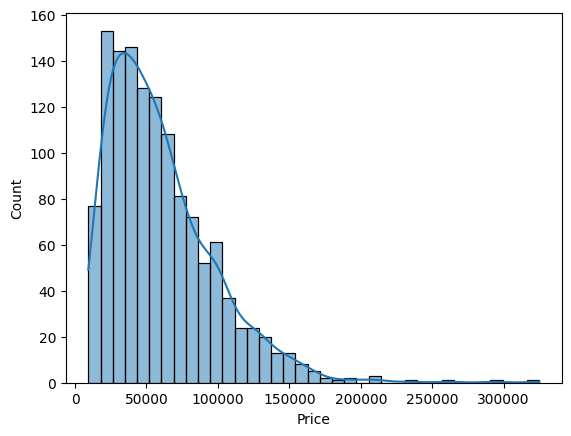

In [ ]:
sns.histplot(df['Price'],kde=True)
# Right skewed so we will do np.log in it

<Axes: xlabel='Price', ylabel='Count'>

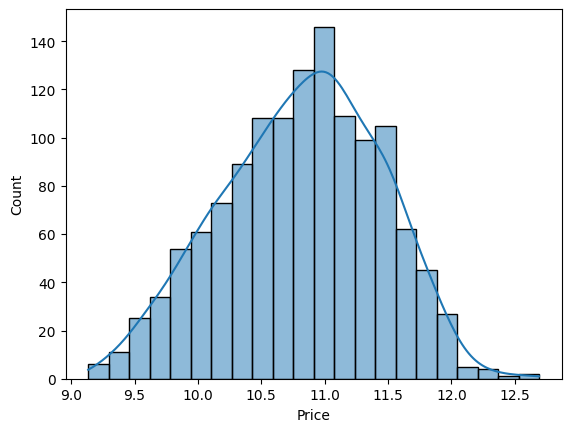

In [ ]:
sns.histplot(np.log(df['Price']),kde=True)
# Now can see that that is uniformly distributed

### X, Y Split and 
train test split

In [ ]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
x

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1024,0,AMD,Windows


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=66)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1041, 12), (261, 12), (1041,), (261,))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Models Import 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 688 to 1044
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1041 non-null   object 
 1   TypeName     1041 non-null   object 
 2   Ram          1041 non-null   int64  
 3   Weight       1041 non-null   float64
 4   TouchScreen  1041 non-null   int64  
 5   Ips          1041 non-null   int64  
 6   ppi          1041 non-null   float64
 7   Cpu brand    1041 non-null   object 
 8   HDD          1041 non-null   int64  
 9   SSD          1041 non-null   int64  
 10  Gpu brand    1041 non-null   object 
 11  os           1041 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 105.7+ KB


### Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = LinearRegression()

linear_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

linear_pipe.fit(x_train, y_train)

y_pred = linear_pipe.predict(x_test)

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.7898631454848009
Linear Regression RMSE: 0.2715263335735479


### RandomForest Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

forest_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

forest_pipe.fit(x_train, y_train)

y_pred = forest_pipe.predict(x_test)

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.8458809440987586
Linear Regression RMSE: 0.23253536506372324


### DecisionTree Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

tree_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

tree_pipe.fit(x_train, y_train)

y_pred = tree_pipe.predict(x_test)

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.7972454349750383
Linear Regression RMSE: 0.26671421474517726


### KNN Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = KNeighborsRegressor()

knn_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

knn_pipe.fit(x_train, y_train)

y_pred = knn_pipe.predict(x_test)

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.7768531624521171
Linear Regression RMSE: 0.2798054761825597


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_enc', OneHotEncoder(sparse_output=False, drop='first'),[0,1,7,10,11] )
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

svm_pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)
])

svm_pipe.fit(x_train, y_train)

y_pred = svm_pipe.predict(x_test)

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.764572299584086
Linear Regression RMSE: 0.28740189152198903


**Sabse achha RandomForest Regressor Perform kar raha hain**

## Exporting the model 
yaa dump the model

In [ ]:
import pickle

pickle.dump(forest_pipe, open('model.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1024,0,AMD,Windows
